<a href="https://colab.research.google.com/github/SlowikJakub/Homework4/blob/main/Homework4Problem1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [102]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [103]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


In [104]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified


In [105]:
label_map = {6:0, 7:1, 8:2, 9:3}
class_names = ['frog', 'horse','ship','truck']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [6,7,8,9]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [6,7,8,9]]

In [106]:
import torch.nn as nn

n_out = 2

model = nn.Sequential(
            nn.Linear(
                3072,  # <1>
                512,   # <2>
            ),
            nn.Tanh(),
            nn.Linear(
                512,   # <2>
                n_out, # <3>
            )
        )

In [107]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [108]:
x = torch.tensor([1.0, 2.0, 3.0])

softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [109]:
softmax(x).sum()

tensor(1.)

In [110]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [111]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


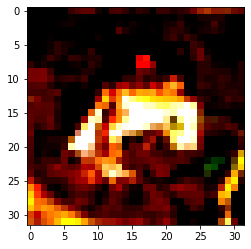

In [112]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [113]:
img_batch = img.view(-1).unsqueeze(0)

In [114]:
out = model(img_batch)
out

tensor([[0.4813, 0.5187]], grad_fn=<SoftmaxBackward>)

In [115]:
_, index = torch.max(out, dim=1)

index

tensor([1])

In [116]:
out = torch.tensor([
    [0.6, 0.4],
    [0.9, 0.1],
    [0.3, 0.7],
    [0.2, 0.8],
])
class_index = torch.tensor([0, 0, 1, 1]).unsqueeze(1)

truth = torch.zeros((4,2))
truth.scatter_(dim=1, index=class_index, value=1.0)
truth

tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.]])

In [117]:
def mse(out):
    return ((out - truth) ** 2).sum(dim=1).mean()
mse(out)

tensor(0.1500)

In [118]:
out.gather(dim=1, index=class_index)

tensor([[0.6000],
        [0.9000],
        [0.7000],
        [0.8000]])

In [119]:
def likelihood(out):
    prod = 1.0
    for x in out.gather(dim=1, index=class_index):
        prod *= x
    return prod

likelihood(out)

tensor([0.3024])

In [120]:
def neg_log_likelihood(out):
    return -likelihood(out).log()

neg_log_likelihood(out)

tensor([1.1960])

In [121]:
out0 = out.clone().detach()
out0[0] = torch.tensor([0.9, 0.1]) # more right

out2 = out.clone().detach()
out2[0] = torch.tensor([0.4, 0.6]) # slightly wrong

out3 = out.clone().detach()
out3[0] = torch.tensor([0.1, 0.9]) # very wrong

mse_comparison = torch.tensor([mse(o) for o in [out0, out, out2, out3]])
mse_comparison

tensor([0.0750, 0.1500, 0.2500, 0.4750])

In [122]:
((mse_comparison / mse_comparison[1]) - 1) * 100

tensor([-50.0000,   0.0000,  66.6667, 216.6667])

In [123]:
nll_comparison = torch.tensor([neg_log_likelihood(o) 
                               for o in [out0, out, out2, out3]])
nll_comparison

tensor([0.7905, 1.1960, 1.6015, 2.9878])

In [124]:
((nll_comparison / nll_comparison[1]) - 1) * 100

tensor([-33.9016,   0.0000,  33.9016, 149.8121])

In [125]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 104.0]])

softmax(x)

tensor([[0., 1.]])

In [126]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 104.0]])

softmax(x)

tensor([[0., 1.]])

In [127]:
torch.log(softmax(x))

tensor([[-inf, 0.]])

In [128]:
log_softmax(x)

tensor([[-104.,    0.]])

In [129]:
torch.exp(log_softmax(x))

tensor([[0., 1.]])

In [130]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

In [131]:
loss = nn.NLLLoss()

In [132]:
img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(0.8378, grad_fn=<NllLossBackward>)

In [133]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 4),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 200

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.294478
Epoch: 1, Loss: 0.910696
Epoch: 2, Loss: 0.471947
Epoch: 3, Loss: 0.032040
Epoch: 4, Loss: 0.455476
Epoch: 5, Loss: 0.017909
Epoch: 6, Loss: 2.603172
Epoch: 7, Loss: 0.010476
Epoch: 8, Loss: 0.050255
Epoch: 9, Loss: 0.002439
Epoch: 10, Loss: 0.103982
Epoch: 11, Loss: 0.026478
Epoch: 12, Loss: 0.048797
Epoch: 13, Loss: 0.000397
Epoch: 14, Loss: 0.006390
Epoch: 15, Loss: 0.094287
Epoch: 16, Loss: 1.737019
Epoch: 17, Loss: 0.002615
Epoch: 18, Loss: 0.048782
Epoch: 19, Loss: 0.012622
Epoch: 20, Loss: 0.035479
Epoch: 21, Loss: 0.002411
Epoch: 22, Loss: 0.013675
Epoch: 23, Loss: 0.023381
Epoch: 24, Loss: 0.060501
Epoch: 25, Loss: 0.092739
Epoch: 26, Loss: 4.302836
Epoch: 27, Loss: 3.095795
Epoch: 28, Loss: 6.540529
Epoch: 29, Loss: 0.068304
Epoch: 30, Loss: 0.074100
Epoch: 31, Loss: 4.357965
Epoch: 32, Loss: 0.362240
Epoch: 33, Loss: 0.000977
Epoch: 34, Loss: 0.066295
Epoch: 35, Loss: 0.796564
Epoch: 36, Loss: 0.002711
Epoch: 37, Loss: 0.000487
Epoch: 38, Loss: 0.000

In [134]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

In [136]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 4),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.800804
Epoch: 1, Loss: 0.856000
Epoch: 2, Loss: 0.775105
Epoch: 3, Loss: 0.639049
Epoch: 4, Loss: 0.550646
Epoch: 5, Loss: 0.747865
Epoch: 6, Loss: 0.703336
Epoch: 7, Loss: 0.659088
Epoch: 8, Loss: 0.515026
Epoch: 9, Loss: 0.542203
Epoch: 10, Loss: 0.638468
Epoch: 11, Loss: 0.370957
Epoch: 12, Loss: 0.672513
Epoch: 13, Loss: 0.517061
Epoch: 14, Loss: 0.292179
Epoch: 15, Loss: 0.609935
Epoch: 16, Loss: 0.404802
Epoch: 17, Loss: 0.448982
Epoch: 18, Loss: 0.379581
Epoch: 19, Loss: 0.538069
Epoch: 20, Loss: 0.419613
Epoch: 21, Loss: 0.339441
Epoch: 22, Loss: 0.459961
Epoch: 23, Loss: 0.376938
Epoch: 24, Loss: 0.218609
Epoch: 25, Loss: 0.263424
Epoch: 26, Loss: 0.216534
Epoch: 27, Loss: 0.372097
Epoch: 28, Loss: 0.183431
Epoch: 29, Loss: 0.267024
Epoch: 30, Loss: 0.451038
Epoch: 31, Loss: 0.285872
Epoch: 32, Loss: 0.216968
Epoch: 33, Loss: 0.257815
Epoch: 34, Loss: 0.303613
Epoch: 35, Loss: 0.248103
Epoch: 36, Loss: 0.256091
Epoch: 37, Loss: 0.177172
Epoch: 38, Loss: 0.164

In [137]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 4),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.783961
Epoch: 1, Loss: 0.770131
Epoch: 2, Loss: 0.737247
Epoch: 3, Loss: 0.513809
Epoch: 4, Loss: 0.837298
Epoch: 5, Loss: 0.752566
Epoch: 6, Loss: 0.862524
Epoch: 7, Loss: 0.466099
Epoch: 8, Loss: 0.519560
Epoch: 9, Loss: 0.850985
Epoch: 10, Loss: 0.267895
Epoch: 11, Loss: 0.557195
Epoch: 12, Loss: 0.500747
Epoch: 13, Loss: 0.282278
Epoch: 14, Loss: 0.322870
Epoch: 15, Loss: 0.549167
Epoch: 16, Loss: 0.753367
Epoch: 17, Loss: 0.280212
Epoch: 18, Loss: 0.551698
Epoch: 19, Loss: 0.178653
Epoch: 20, Loss: 0.545549
Epoch: 21, Loss: 0.201131
Epoch: 22, Loss: 0.430533
Epoch: 23, Loss: 0.318644
Epoch: 24, Loss: 0.586033
Epoch: 25, Loss: 0.259173
Epoch: 26, Loss: 0.199506
Epoch: 27, Loss: 0.215389
Epoch: 28, Loss: 0.157956
Epoch: 29, Loss: 0.259703
Epoch: 30, Loss: 0.274387
Epoch: 31, Loss: 0.113204
Epoch: 32, Loss: 0.192550
Epoch: 33, Loss: 0.194080
Epoch: 34, Loss: 0.086254
Epoch: 35, Loss: 0.132396
Epoch: 36, Loss: 0.121307
Epoch: 37, Loss: 0.108095
Epoch: 38, Loss: 0.159

In [139]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.999950


In [173]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.765750


In [145]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

In [146]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

loss_fn = nn.CrossEntropyLoss()

In [147]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 4))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.709206
Epoch: 1, Loss: 0.912435
Epoch: 2, Loss: 0.738200
Epoch: 3, Loss: 0.673513
Epoch: 4, Loss: 0.819449
Epoch: 5, Loss: 0.685899
Epoch: 6, Loss: 0.686769
Epoch: 7, Loss: 0.673209
Epoch: 8, Loss: 0.642436
Epoch: 9, Loss: 0.290140
Epoch: 10, Loss: 0.529390
Epoch: 11, Loss: 0.790801
Epoch: 12, Loss: 0.416622
Epoch: 13, Loss: 0.397321
Epoch: 14, Loss: 0.483399
Epoch: 15, Loss: 0.366630
Epoch: 16, Loss: 0.328742
Epoch: 17, Loss: 0.399762
Epoch: 18, Loss: 0.332418
Epoch: 19, Loss: 0.271088
Epoch: 20, Loss: 0.180062
Epoch: 21, Loss: 0.250869
Epoch: 22, Loss: 0.096655
Epoch: 23, Loss: 0.169511
Epoch: 24, Loss: 0.313647
Epoch: 25, Loss: 0.184826
Epoch: 26, Loss: 0.265405
Epoch: 27, Loss: 0.271133
Epoch: 28, Loss: 0.127342
Epoch: 29, Loss: 0.112625
Epoch: 30, Loss: 0.059669
Epoch: 31, Loss: 0.163593
Epoch: 32, Loss: 0.052240
Epoch: 33, Loss: 0.122262
Epoch: 34, Loss: 0.033578
Epoch: 35, Loss: 0.037476
Epoch: 36, Loss: 0.037849
Epoch: 37, Loss: 0.184902
Epoch: 38, Loss: 0.030

In [148]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


In [149]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.765750


In [150]:
sum([p.numel() for p in model.parameters()])

3737732

In [151]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737732

In [152]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

sum([p.numel() for p in first_model.parameters()])

1574402

In [153]:
sum([p.numel() for p in nn.Linear(3072, 512).parameters()])

1573376

In [154]:
sum([p.numel() for p in nn.Linear(3072, 1024).parameters()])

3146752

In [155]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

In [156]:
conv = nn.Conv2d(3, 16, kernel_size=3)

In [157]:
conv.weight.shape

torch.Size([16, 3, 3, 3])

In [158]:
conv.bias.shape

torch.Size([16])

In [159]:
img, _ = cifar2[0]

output = conv(img.unsqueeze(0))

In [160]:
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


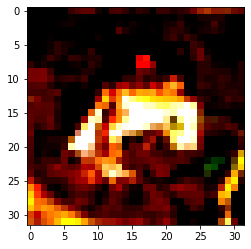

In [161]:
plt.imshow(img.permute(1, 2, 0), cmap='gray')
plt.show()

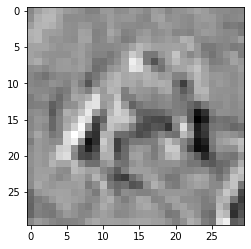

In [162]:
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [163]:
output.shape

torch.Size([1, 16, 30, 30])

In [164]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

In [165]:
output = conv(img.unsqueeze(0))

output.shape

torch.Size([1, 1, 32, 32])

In [166]:
with torch.no_grad():
    conv.bias.zero_()

In [167]:
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

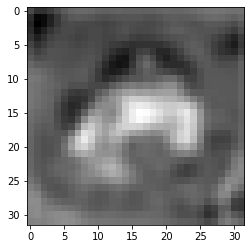

In [168]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [169]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

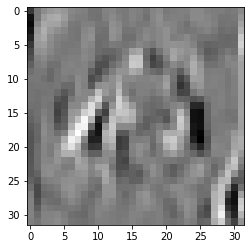

In [170]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [171]:
pool = nn.MaxPool2d(2)

In [172]:
output = pool(img.unsqueeze(0))

output.shape

torch.Size([1, 3, 16, 16])